
## Analyzing Correlation between the Atlantic Multidecadal Oscillation and ERA5 monthly averaged precip anomalies over Africa

In [111]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from clim680_function import xyticks

In [112]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [113]:
#Climate index of choice: Atlantic Multidecadal Oscillation (AMO)
path='/homes/areed29/CLIM680_Fall2021/CLIM_INDICES/'
file='amon.us.data'
index_name='amo'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,na_values=['-99.99','-99.990'])
df.drop(df.tail(5).index,inplace=True)


In [114]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'
print(start_date)

1948-1-01


In [115]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=876, freq='MS')

In [116]:
clim_index=df.T.unstack().values
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='amo')
ds_index

<xarray.Dataset>
Dimensions:  (time: 876)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    amo      (time) object '-0.019' '-0.031' '0.024' ... 0.297 0.12 0.17

<xarray.Dataset>
Dimensions:  (time: 501)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
Data variables:
    amo      (time) object '-0.200' '-0.159' '-0.236' ... '0.349' 0.433 0.304
<xarray.DataArray 'amo' (time: 501)>
array([-0.2  , -0.159, -0.236, -0.245, -0.125, -0.05 , -0.102, -0.123,
       -0.117, -0.095, -0.093, -0.067, -0.009, -0.086, -0.146, -0.008,
        0.122,  0.101,  0.043,  0.016, -0.015, -0.069, -0.204, -0.257,
       -0.184, -0.183, -0.002, -0.098, -0.087, -0.065, -0.097, -0.118,
       -0.039, -0.189, -0.14 , -0.009, -0.084, -0.081, -0.083, -0.185,
       -0.194, -0.187, -0.231, -0.311, -0.31 , -0.374, -0.42 , -0.383,
       -0.301, -0.107,  0.078,  0.056, -0.051, -0.057, -0.018, -0.161,
       -0.218, -0.198, -0.161, -0.006, -0.109, -0.091, -0.128, -0.16 ,
       -0.169, -0.327, -0.269, -0.229, -0.212, -0.347, -0.427, -0.321,
       -0.358, -0.332, -0.359, -0.404, -0.34 , -0.131, -0.156, -0.285,
       -0.251, -0.248, -0.298, -

Text(0.5, 0.98, 'Atlantic Multidecadal Oscillation')

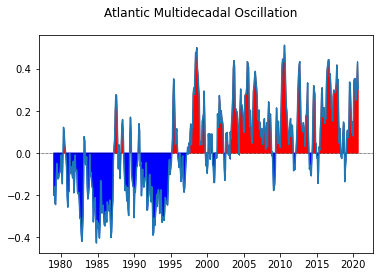

In [117]:
sliced_amo=ds_index.sel(time=slice(ds_index['time'][372],ds_index['time'][-4]))
print(sliced_amo)
#Warm AMO- above 0
#Cold AMO-below 0
amo_values = sliced_amo.amo
#print(nao_values)
amo_float = amo_values.astype(float)
print(amo_float)
warm_amo=amo_float.where(amo_float>0.0)
cold_amo = amo_float.where(amo_float<0.0)
plt.fill_between(amo_float['time'],0,warm_amo,color='red')
plt.fill_between(amo_float['time'],cold_amo, 0,color='blue')
plt.axhline(0,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(0,color='black',linewidth=0.5,linestyle='dotted')
plt.plot(amo_float['time'],amo_float)
plt.suptitle('Atlantic Multidecadal Oscillation')
#plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/AMO_defined')

### Next, read in the ERA5 monthly averaged precipitation data

In [118]:
f= '/scratch/areed29/ERA5data/*.nc' #loads in Netcdf ERA5data
DS1 = xr.open_mfdataset(f) #opens the file
dataset =DS1.mean(dim='expver')
data_lat= DS1.latitude #latitudes
data_lon= DS1.longitude #longitudes
precip = dataset.tp
prec_water=dataset.tcwv
clouds = dataset.tcc

In [119]:
precip=precip.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))
print(precip)
clouds=clouds.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))
prec_water=prec_water.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))

<xarray.DataArray 'tp' (time: 501, latitude: 401, longitude: 241)>
dask.array<getitem, shape=(501, 401, 241), dtype=float32, chunksize=(501, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01


In [120]:
# Mask out only land values for data, then calculate the climatology
ds_mean = DS1.mean('expver')
mask = ds_mean.lsm #loads in land-sea mask
land_ds_precip = precip.where(mask>0.5)
land_ds_clouds = clouds.where(mask>0.5)
land_ds_prec_water= prec_water.where(mask>0.5)
ds_climo_precip = land_ds_precip.groupby('time.month').mean()
ds_climo_clouds = land_ds_clouds.groupby('time.month').mean()
ds_climo_tcwv = land_ds_prec_water.groupby('time.month').mean()
#Now calculate land anomalies
ds_anoms_precip = land_ds_precip.groupby('time.month')-ds_climo_precip
ds_anoms_clouds = land_ds_clouds.groupby('time.month')-ds_climo_clouds
ds_anoms_tcwv = land_ds_prec_water.groupby('time.month')-ds_climo_tcwv

In [121]:
#Also included are calculations for nonmasking (domain includes water in addition to land)
precip_climo_nonmasked = precip.groupby('time.month').mean()
precip_anoms_nonmasked = precip.groupby('time.month')-precip_climo_nonmasked
precip_nonmasked_std = precip_anoms_nonmasked.std()
precip_nonmasked_norm = precip_anoms_nonmasked/precip_nonmasked_std
point_nonmasked_precip = precip_nonmasked_norm.sel(latitude=15,longitude=10,method='nearest')

### Normalization of Anomalies

In [122]:
precip_std = ds_anoms_precip.std()
clouds_std = ds_anoms_clouds.std()
tcwv_std = ds_anoms_tcwv.std()
tp_norm=ds_anoms_precip/precip_std.load()
clouds_norm = ds_anoms_clouds/clouds_std.load()
tcwv_norm = ds_anoms_tcwv/tcwv_std.load()
print(tp_norm)

<xarray.DataArray 'tp' (time: 501, latitude: 401, longitude: 241)>
dask.array<truediv, shape=(501, 401, 241), dtype=float32, chunksize=(1, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8 9


## Pick a point from the precipitation anomalies

In [123]:
pt_tp=tp_norm.sel(latitude=15,longitude=10,method='nearest') #Sahel region
pt_clouds=clouds_norm.sel(latitude=15,longitude=10,method='nearest') #Sahel region
pt_tcwv=tcwv_norm.sel(latitude=15,longitude=10,method='nearest') #Sahel region

### Next, plot the AMO Index and this point together

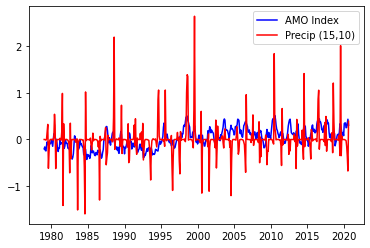

In [124]:
plt.plot(amo_float['time'],amo_float,'b')
plt.plot(pt_tp['time'],pt_tp,'r')
plt.legend(['AMO Index','Precip (15,10)'])

### Calculate Pearson's correlation

In [125]:
R=np.corrcoef(amo_float,pt_tp)
R

array([[1.        , 0.13938023],
       [0.13938023, 1.        ]])

In [126]:
corr=R[0,1]
corr 

0.1393802258042141

## Correlation over the entire domain

In [127]:
r_map_precip=xr.corr(amo_float,tp_norm,dim='time').load()
r_map_tcwv = xr.corr(amo_float,tcwv_norm,dim='time').load()
r_map_clouds = xr.corr(amo_float,clouds_norm, dim='time').load()
all_corr_maps = ([r_map_clouds,r_map_precip,r_map_tcwv])
print(all_corr_maps)

[<xarray.DataArray (latitude: 401, longitude: 241)>
array([[        nan,         nan,         nan, ..., -0.05907682,
        -0.05752173, -0.05901462],
       [        nan,         nan,         nan, ..., -0.05777521,
        -0.0601268 , -0.06182499],
       [        nan,         nan,         nan, ..., -0.05823841,
        -0.06057601, -0.06290636],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0, <xarray.DataArray (latitude: 401, longitude: 241)>
array([[        nan,         nan,         nan, ..., -0.00171908,
         0.00606744,  0.00213173],
       [  

### Plot the correlation map

Text(0.5, 0.98, 'Correlation between AMO Index and Precipitation Anomalies over Africa')

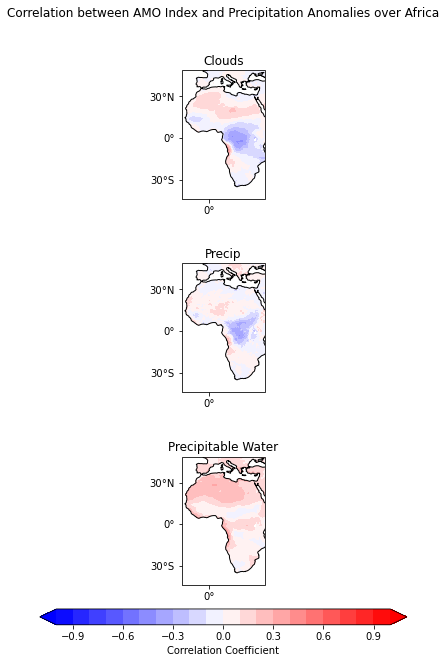

In [128]:
labels=['Clouds','Precip', 'Precipitable Water']
clevs=np.arange(-1,1.1,0.1)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the variables and plot
for i, corr in enumerate(all_corr_maps):

        # Select the variable
        data=all_corr_maps[i]

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=all_corr_maps[i]['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,all_corr_maps[i]['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='bwr',extend='both')

       # Longitude and latitude labels
        xyticks(axs[i],lons,all_corr_maps[i]['latitude'])
        #Set extent for the plots
        axs[i].set_extent([-20,40,-40,45])
        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',shrink=0.7, label='Correlation Coefficient')

# Add a big title at the top
plt.suptitle('Correlation between AMO Index and Precipitation Anomalies over Africa')

### Statistical Significance of a Correlation

In [129]:
from scipy.stats import pearsonr


In [130]:
precip = dataset.tp
precip=precip.sel(time=slice(ds_index['time'][0],ds_index['time'][-4])).load()
precip_climo_nonmasked = precip.groupby('time.month').mean()
precip_anoms_nonmasked = precip.groupby('time.month')-precip_climo_nonmasked
print(precip_anoms_nonmasked)

<xarray.DataArray 'tp' (time: 501, latitude: 401, longitude: 241)>
array([[[-1.05369650e-03, -8.09700694e-04, -6.87222928e-04, ...,
          4.65327292e-04,  4.66181431e-04,  4.72311163e-04],
        [-9.47050750e-04, -7.00581819e-04, -5.46737108e-04, ...,
          3.21558211e-04,  2.81161861e-04,  2.83970032e-04],
        [-7.02102203e-04, -6.98728021e-04, -5.44982497e-04, ...,
          2.41386937e-04,  2.02361844e-04,  1.56503753e-04],
        ...,
        [-9.55506694e-04, -1.01401657e-03, -9.50188609e-04, ...,
         -1.37839792e-03, -1.41137699e-03, -1.44631206e-03],
        [-8.90494557e-04, -9.48617235e-04, -9.72995767e-04, ...,
         -1.27174915e-03, -1.33733638e-03, -1.37672899e-03],
        [-7.94823281e-04, -7.89884711e-04, -8.13835533e-04, ...,
         -1.11129764e-03, -1.17907184e-03, -1.28091872e-03]],

       [[-1.17675867e-04,  1.39677431e-04,  2.76410021e-04, ...,
          3.22224572e-04,  4.11197660e-04,  4.07106592e-04],
        [ 1.01419166e-04,  3.4285103

In [131]:
nx=len(precip_anoms_nonmasked['longitude'])
ny=len(precip_anoms_nonmasked['latitude'])
#print(amo_float)
#tp_norm_nonans= tp_norm.where(tp_norm<np.nan,tp_norm>np.nan)
#print(tp_norm_nonans.values)
p_array=np.zeros((ny,nx))
r_array=np.zeros((ny,nx))

for i in range(nx):
    for j in range(ny):
        r,p=pearsonr(amo_float,precip_anoms_nonmasked[:,j,i])
        r_array[j,i]=r
        p_array[j,i]=p
r_array.shape
# Array contains Nans, so it is throwing an error? Or does this mean there is no statistical significance?

(401, 241)

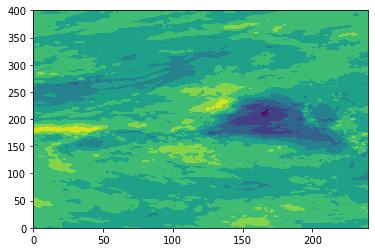

In [132]:
plt.contourf(r_array)

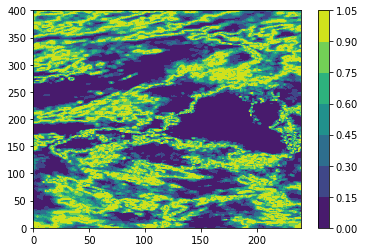

In [133]:
plt.contourf(p_array)
plt.colorbar()


### Now, plot the correlation including significance

In [134]:
mask_sig=np.where(p_array<0.05,r_array,np.nan)

Text(0.5, 1.0, 'Correlation between de-trended AMO Index and Precipitation Anomalies over Africa')

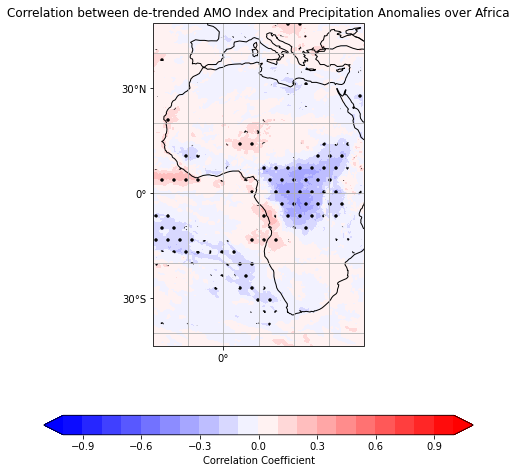

In [135]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))
# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
# Add cyclic point
data=r_array
data,lon=add_cyclic_point(data,coord=precip_anoms_nonmasked['longitude'])
mask_data,lons=add_cyclic_point(mask_sig,coord=precip_anoms_nonmasked['longitude'])
# Make a filled contour plot
cs=ax.contourf(lon,precip_anoms_nonmasked['latitude'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')
ax.contourf(lon,precip_anoms_nonmasked['latitude'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)
#ax.set_extent([-20,40,-40,45])
# Add coastlines
ax.coastlines()
# Add gridlines
ax.gridlines()
#Function to define x,yticks for lat and lon points
xyticks(ax,lon,precip_anoms_nonmasked['latitude'])
ax.set_extent([-20,40,-40,45])
# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')
# Add title
plt.title('Correlation between de-trended AMO Index and Precipitation Anomalies over Africa')

### Turn NANs present in tp_norm (a masked, normalized anomaly array) into 0s for correlation loop to work

In [136]:
tp_norm=tp_norm.fillna(0).load()
clouds_norm=clouds_norm.fillna(0).load()
tcwv_norm = tcwv_norm.fillna(0).load()

### Precipitation variable

In [138]:
nx=len(tp_norm['longitude'])
ny=len(tp_norm['latitude'])
print(nx)
print(ny)

p_array_precip=np.zeros((ny,nx))
r_array_precip=np.zeros((ny,nx))

for i in range(nx):
    for j in range(ny):
        r,p=pearsonr(amo_float,tp_norm[:,j,i])
        r_array_precip[j,i]=r
        p_array_precip[j,i]=p
r_array_precip.shape


241
401


(401, 241)

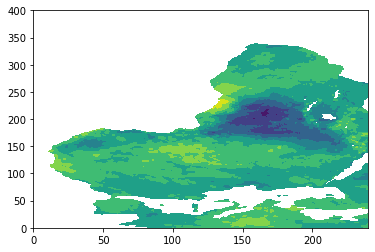

In [139]:
plt.contourf(r_array_precip)

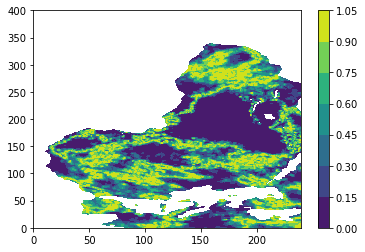

In [140]:
plt.contourf(p_array_precip)
plt.colorbar()


### Next, clouds

In [141]:
nx=len(clouds_norm['longitude'])
ny=len(clouds_norm['latitude'])
print(nx)
print(ny)

p_array_clouds=np.zeros((ny,nx))
r_array_clouds=np.zeros((ny,nx))

for i in range(nx):
    for j in range(ny):
        r,p=pearsonr(amo_float,clouds_norm[:,j,i])
        r_array_clouds[j,i]=r
        p_array_clouds[j,i]=p
r_array_clouds.shape


241
401


(401, 241)

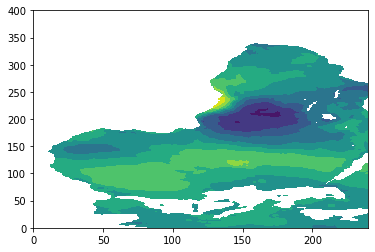

In [142]:
plt.contourf(r_array_clouds)

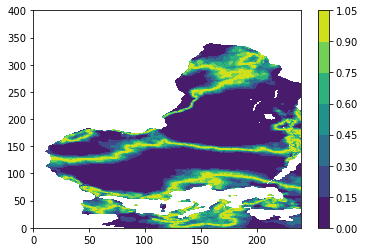

In [143]:
plt.contourf(p_array_clouds)
plt.colorbar()


### Then, Precipitable Water

In [144]:
nx=len(tcwv_norm['longitude'])
ny=len(tcwv_norm['latitude'])
print(nx)
print(ny)

p_array_tcwv=np.zeros((ny,nx))
r_array_tcwv=np.zeros((ny,nx))

for i in range(nx):
    for j in range(ny):
        r,p=pearsonr(amo_float,tcwv_norm[:,j,i])
        r_array_tcwv[j,i]=r
        p_array_tcwv[j,i]=p
r_array_tcwv.shape


241
401


(401, 241)

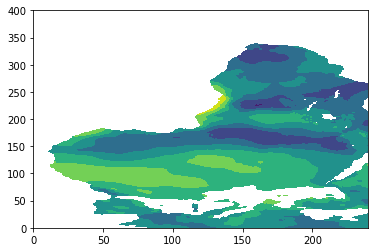

In [145]:
plt.contourf(r_array_tcwv)

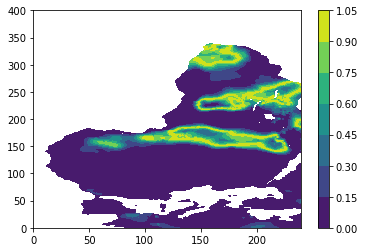

In [146]:
plt.contourf(p_array_tcwv)
plt.colorbar()


### Now, plot the correlation including significance

In [147]:
all_anoms = ([clouds_norm,tp_norm,tcwv_norm])
print(all_anoms)


[<xarray.DataArray 'tcc' (time: 501, latitude: 401, longitude: 241)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.41918415,
          0.39683267,  0.3832504 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.43496767,
          0.45397615,  0.44439802],
        [ 0.        ,  0.        ,  0.        , ...,  0.3996244 ,
          0.41866425,  0.41846108],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.29842603,
          0.29311338,  0.27582625],
        [ 0.        ,  0.        ,  0.        , ...,  0.2095604 ,
          0.17775454,  0.15873948],
        [ 0.        ,  0.        ,  0.        , ...,  0.14153533,
          0.10948336,  0.09066635]

In [148]:
all_corr_maps_sig = ([r_array_clouds,r_array_precip,r_array_tcwv])
print(all_corr_maps_sig)


[array([[        nan,         nan,         nan, ..., -0.05907682,
        -0.05752174, -0.05901462],
       [        nan,         nan,         nan, ..., -0.05777521,
        -0.06012679, -0.06182499],
       [        nan,         nan,         nan, ..., -0.05823842,
        -0.060576  , -0.06290635],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]]), array([[        nan,         nan,         nan, ..., -0.00171908,
         0.00606744,  0.00213173],
       [        nan,         nan,         nan, ...,  0.0047064 ,
         0.00447052,  0.00061676],
       [        nan,         nan,         nan, ...,  0.00393422,
         0.00378711,  0.00384283],
       ...,
       [        nan,         nan,         nan, ...,         nan,
        

In [149]:
mask_sig_clouds=np.where(p_array_clouds<0.05,r_array_clouds,np.nan)
mask_sig_precip=np.where(p_array_precip<0.05,r_array_precip,np.nan)
mask_sig_tcwv=np.where(p_array_tcwv<0.05,r_array_tcwv,np.nan)
all_mask_maps = ([mask_sig_clouds,mask_sig_precip,mask_sig_tcwv])

Text(0.5, 0.98, 'Correlation between de-trended AMO Index and Continental Normalized Anomalies over Africa')

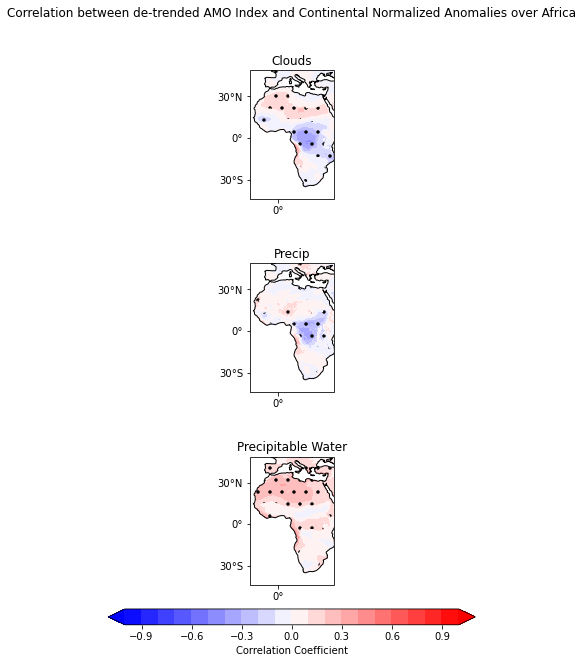

In [150]:
labels=['Clouds','Precip', 'Precipitable Water']
clevs=np.arange(-1,1.1,0.1)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the variables and plot
for i, corr in enumerate(all_corr_maps_sig):

        # Select the variable
        data=all_corr_maps_sig[i]
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=all_anoms[i]['longitude'])
        mask_data,lons = add_cyclic_point(all_mask_maps[i],coord=all_anoms[i]['longitude'])
        # Contour plot
        cs=axs[i].contourf(lons,all_anoms[i]['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='bwr',extend='both')
        axs[i].contourf(lons,all_anoms[i]['latitude'],mask_data,[0,1],transform= ccrs.PlateCarree(),colors='None',
                       hatches =['.','.'], extend ='both', alpha=0)
       # Longitude and latitude labels
        xyticks(axs[i],lons,all_anoms[i]['latitude'])
        #Set extent for the plots
        axs[i].set_extent([-20,40,-40,45])
        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',shrink=0.7, label='Correlation Coefficient')

# Add a big title at the top
plt.suptitle('Correlation between de-trended AMO Index and Continental Normalized Anomalies over Africa')

### Zoom in on precipitation

Text(0.5, 1.0, 'Correlation between de-trended AMO Index and Continental Precipitation Anomalies over Africa')

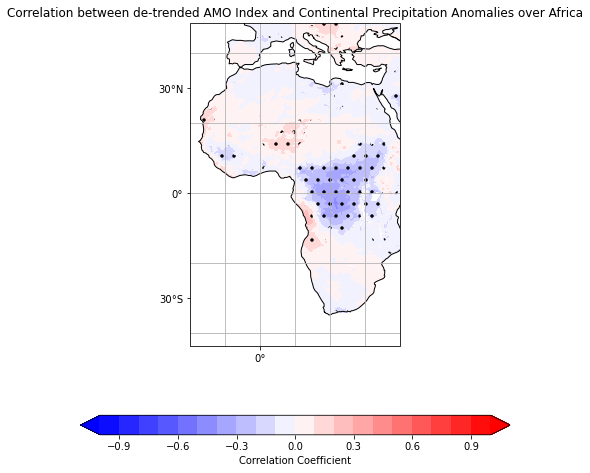

In [151]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))
# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
# Add cyclic point
data=r_array_precip
data,lon=add_cyclic_point(data,coord=tp_norm['longitude'])
mask_data,lons=add_cyclic_point(mask_sig_precip,coord=tp_norm['longitude'])
# Make a filled contour plot
cs=ax.contourf(lon,tp_norm['latitude'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')
ax.contourf(lon,tp_norm['latitude'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)

# Add coastlines
ax.coastlines()
# Add gridlines
ax.gridlines()
#Function to define x,yticks for lat and lon points
xyticks(ax,lon,tp_norm['latitude'])
ax.set_extent([-20,40,-40,45])
# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')
# Add title
plt.title('Correlation between de-trended AMO Index and Continental Precipitation Anomalies over Africa')